In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_final_train = pd.read_csv('../data/final_train.csv',index_col=0)

In [3]:
df_feature = pd.read_csv('../data/feature.csv',index_col=0)

In [4]:
df_feature.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [5]:
feature_info = []
for col in df_final_train.columns:
    n_unique = len(df_final_train[col].unique())
    feature_info.append({'feature':col, 'n_unique': n_unique, 'datatype':df_final_train[col].dtype})
feature_info_df = pd.DataFrame(feature_info)

In [6]:
feature_info_df[(feature_info_df.datatype == 'object')] 

,datatype,feature,n_unique
37,object,MSZoning,5
38,object,Street,2
39,object,Alley,2
40,object,LotShape,4
41,object,LandContour,4
42,object,Utilities,2
43,object,LotConfig,5
44,object,LandSlope,3
45,object,Neighborhood,25
46,object,Condition1,9


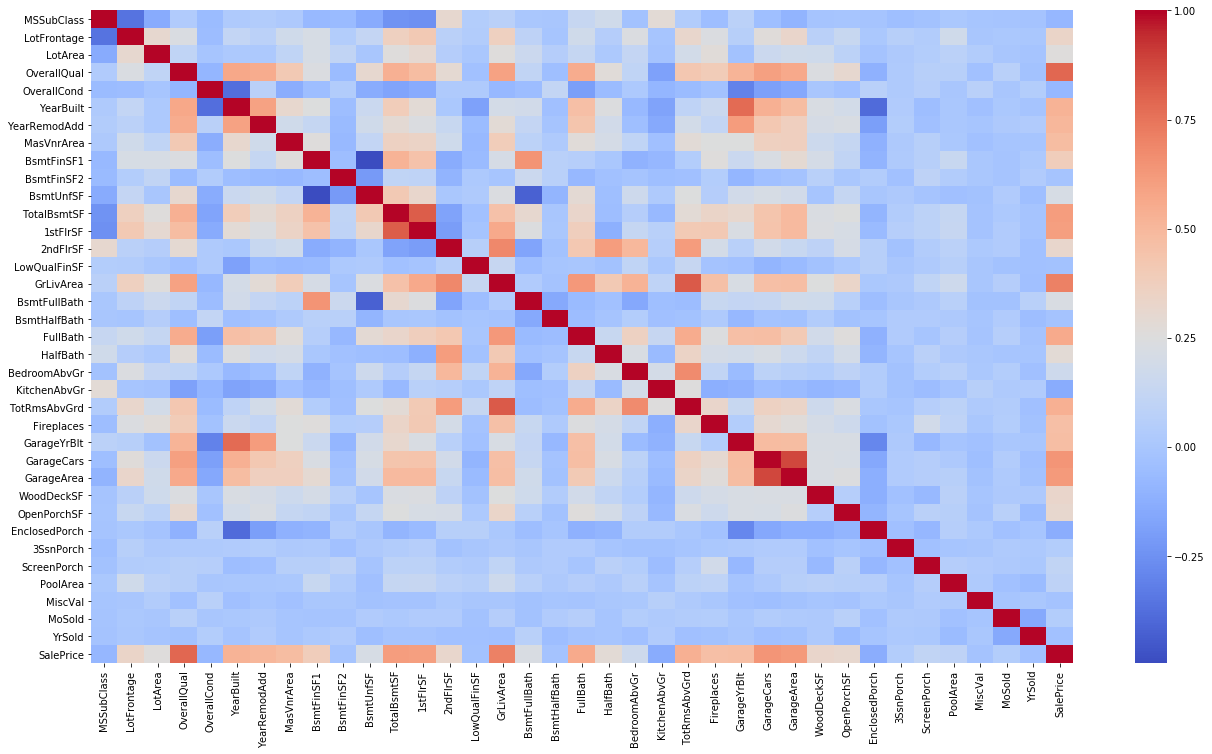

In [7]:
f, ax = plt.subplots(figsize=(22,12))
sns.heatmap(df_final_train.corr(),cmap = 'coolwarm')

Text(0.5,6.8,'OverallQual')

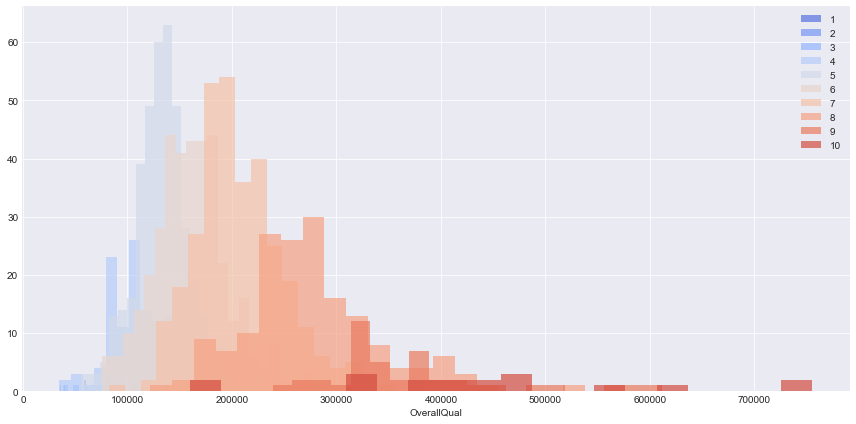

In [8]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df_final_train,hue="OverallQual",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'SalePrice',bins=20,alpha=0.7)
plt.legend()
plt.xlabel('OverallQual')

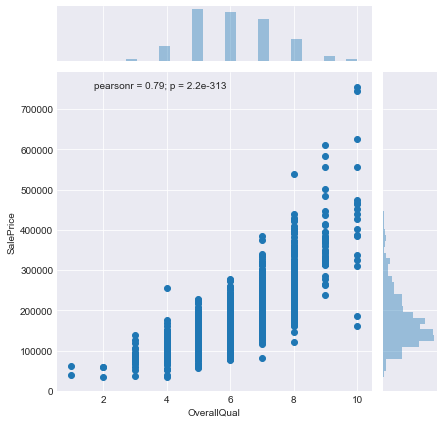

In [9]:
sns.jointplot(x='OverallQual',y='SalePrice',data=df_final_train)

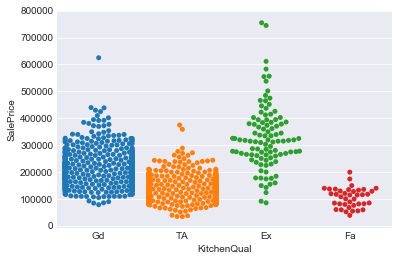

In [10]:
sns.swarmplot(x='KitchenQual',y='SalePrice',data=df_final_train)

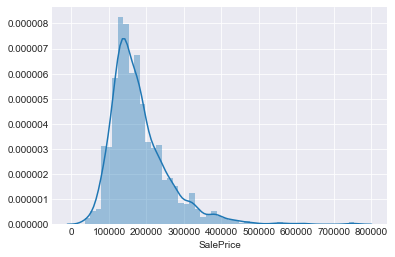

In [11]:
sns.distplot(df_final_train['SalePrice'])

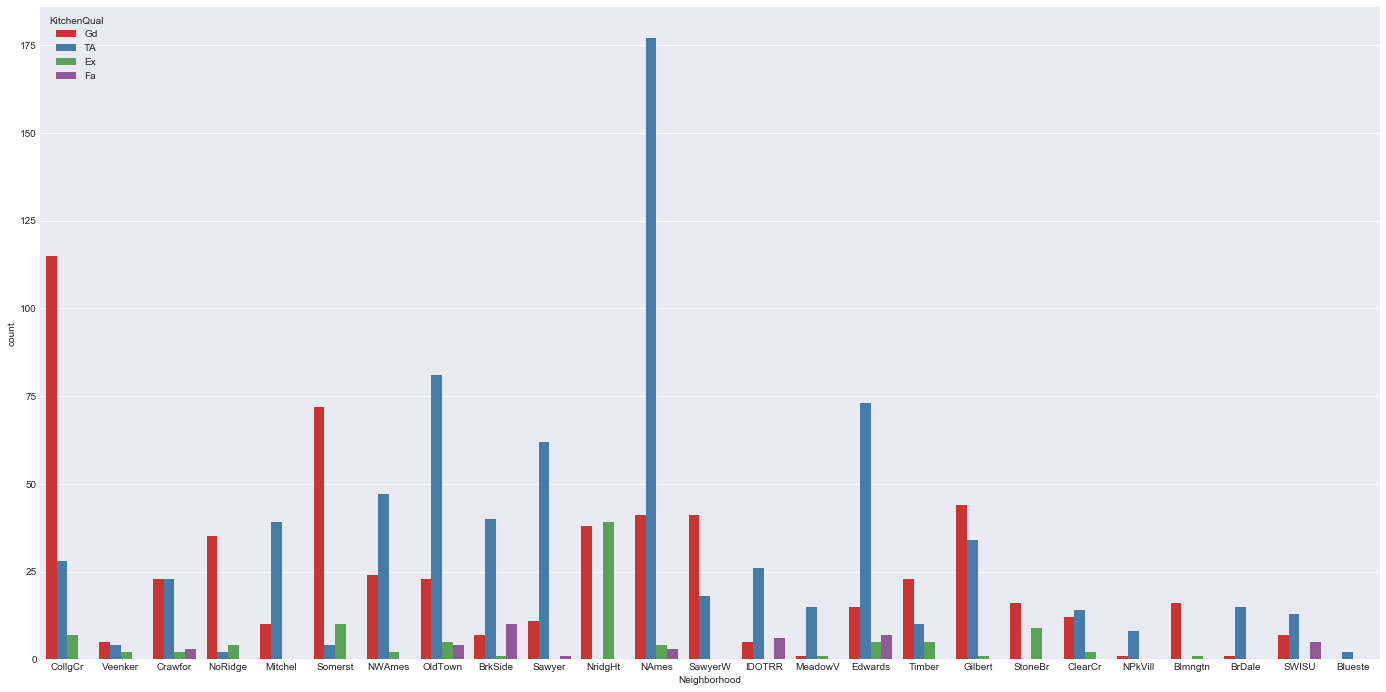

In [12]:
plt.figure(figsize=(24,12))
sns.countplot(x='Neighborhood',hue='KitchenQual',data=df_final_train,palette='Set1')

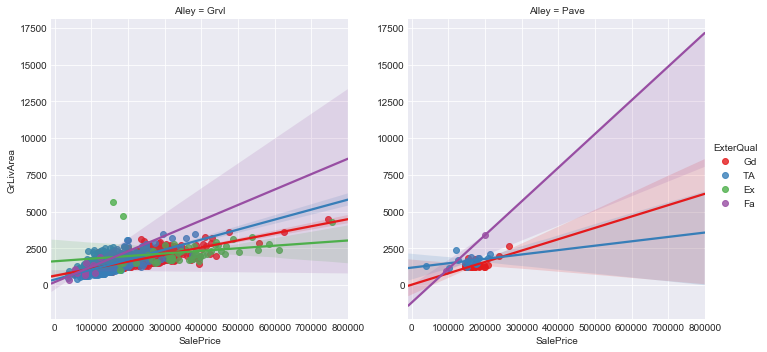

In [13]:
plt.figure(figsize=(24,12))
sns.lmplot(y='GrLivArea',x='SalePrice',data=df_final_train,hue='ExterQual',
           col='Alley',palette='Set1')

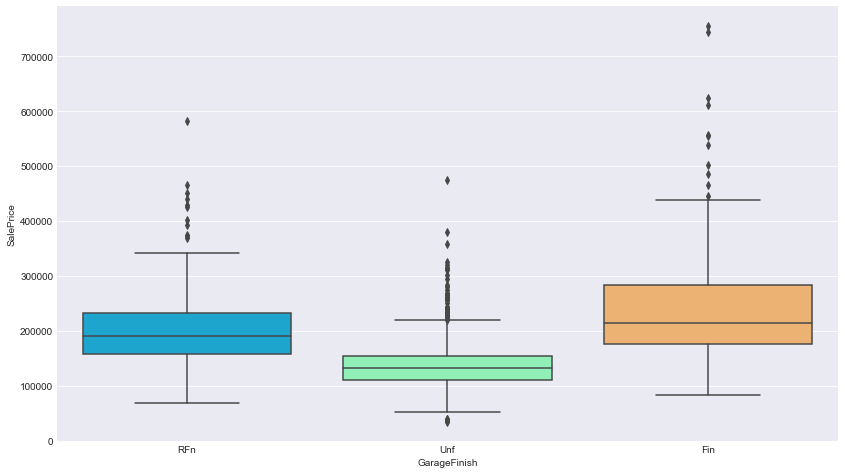

In [14]:
plt.figure(figsize=(14,8))
sns.boxplot(x='GarageFinish',y='SalePrice',data=df_final_train,palette='rainbow')

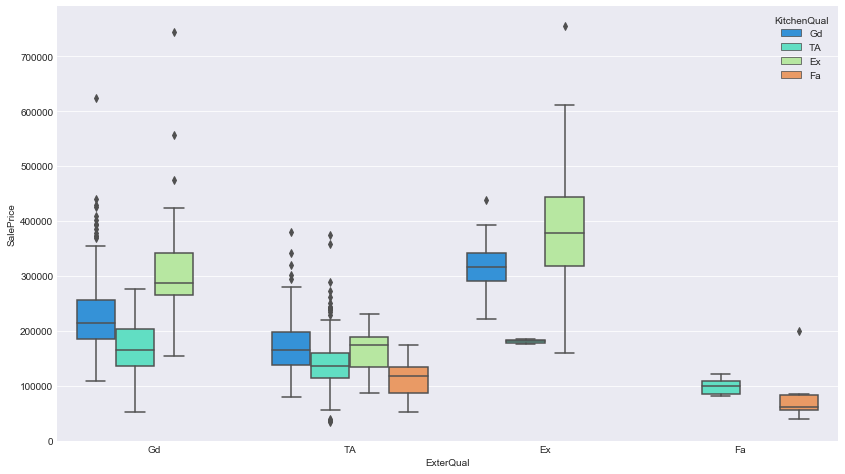

In [15]:
plt.figure(figsize=(14,8))
sns.boxplot(x='ExterQual',y='SalePrice',data=df_final_train,palette='rainbow',hue="KitchenQual")

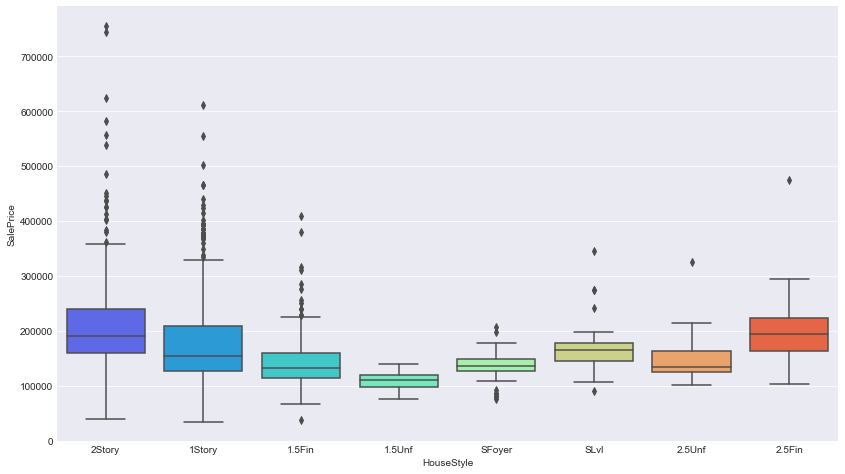

In [16]:
plt.figure(figsize=(14,8))
sns.boxplot(x='HouseStyle',y='SalePrice',data=df_final_train,palette='rainbow')

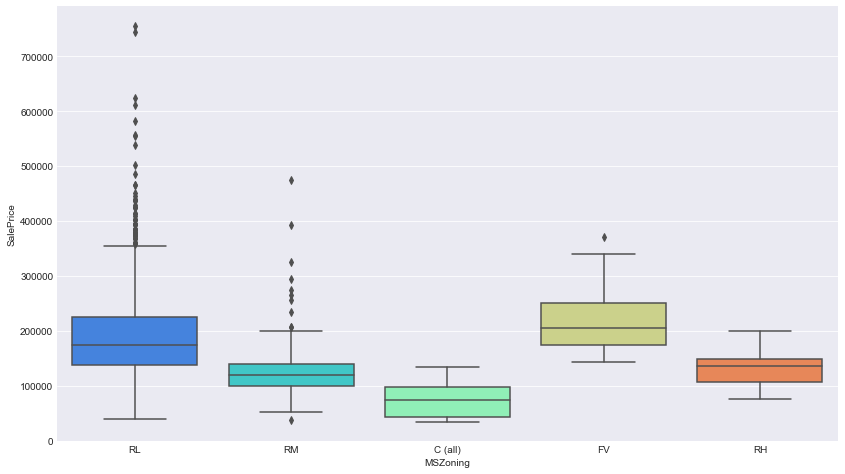

In [17]:
plt.figure(figsize=(14,8))
sns.boxplot(x='MSZoning',y='SalePrice',data=df_final_train,palette='rainbow')

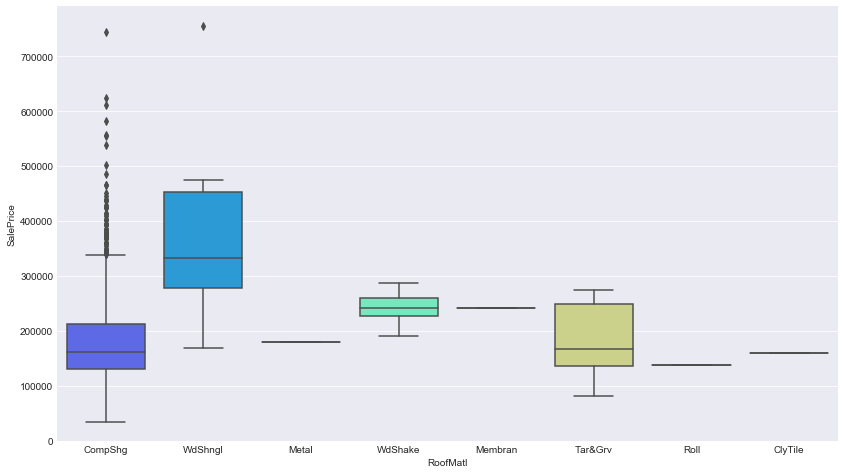

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(x='RoofMatl',y='SalePrice',data=df_final_train,palette='rainbow')

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca_df = df_feature.select_dtypes(exclude=['object'])

In [21]:
pca = PCA()
pca.fit(pca_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

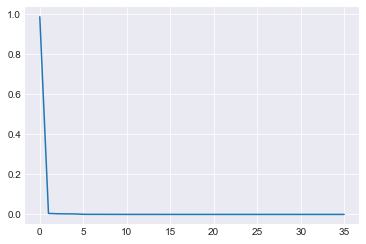

In [22]:
plt.plot(pca.explained_variance_ratio_)

In [24]:
pca_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


In [26]:
pca = PCA(2)
pca.fit(pca_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca_df.shape

(1460, 36)

In [29]:
ames_pca_df = pd.DataFrame(pca.transform(pca_df), 
                               columns=['Dim 1', 'Dim 2'],
                               index=pca_df.index)

In [30]:
ames_pca_df.shape

(1460, 2)

In [36]:
pca.components_

array([[-5.92684301e-04,  6.78079956e-04,  9.99702429e-01,
         1.48025737e-05, -6.54208740e-07,  4.49394823e-05,
         2.96889867e-05,  1.89394826e-03,  9.82484947e-03,
         1.79654324e-03, -1.01872831e-04,  1.15195199e-02,
         1.16476342e-02,  2.24445626e-03,  2.34744663e-05,
         1.39155649e-02,  8.24574887e-06,  1.14862674e-06,
         7.00023076e-06,  7.33451005e-07,  9.81260251e-06,
        -3.91505964e-07,  3.10875618e-05,  1.75673441e-05,
        -5.82828544e-05,  1.16574595e-05,  3.88354698e-03,
         2.16116951e-03,  5.65953985e-04, -1.12975785e-04,
         6.01414962e-05,  2.42009959e-04,  3.13711329e-04,
         1.89413412e-03,  3.41222917e-07, -1.90089597e-06],
       [-3.05514261e-03,  1.11857203e-02, -2.27619867e-02,
         1.31971573e-03, -2.49297392e-04,  1.58324740e-02,
         1.05953533e-02,  1.18516737e-01,  2.39155712e-01,
        -1.00152273e-02,  2.53000295e-01,  4.82140780e-01,
         4.22233102e-01,  1.92224481e-01,  2.97858977e-